In [104]:
import numpy as np 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [78]:
#import iris.csv 
data=pd.read_csv('iris.csv')

In [79]:
print(data.head(10))

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
5           5.4          3.9           1.7          0.4  Setosa
6           4.6          3.4           1.4          0.3  Setosa
7           5.0          3.4           1.5          0.2  Setosa
8           4.4          2.9           1.4          0.2  Setosa
9           4.9          3.1           1.5          0.1  Setosa


In [80]:
#Printing data attributes : 
for attribute in data.columns:
    print(attribute)

sepal.length
sepal.width
petal.length
petal.width
variety


In [81]:
#Printing all species with numbers : 
species = data['variety'].value_counts()
print(species)

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64


In [82]:
#Our data infos : 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [83]:
data.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<AxesSubplot:title={'center':'sepal.length'}>,
        <AxesSubplot:title={'center':'sepal.width'}>],
       [<AxesSubplot:title={'center':'petal.length'}>,
        <AxesSubplot:title={'center':'petal.width'}>]], dtype=object)

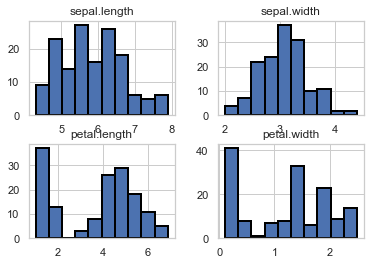

In [84]:
#Printing the histogram of data : 
data.hist(edgecolor='black', linewidth=2)

In [85]:
sb.set(style="whitegrid")


In [86]:

plt.figure(figsize=(12, 6))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

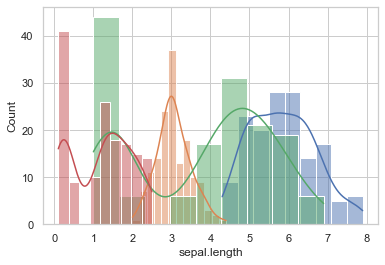

In [87]:
for column in data.columns[:-1]: 
    sb.histplot(data[column], kde=True, label=column)

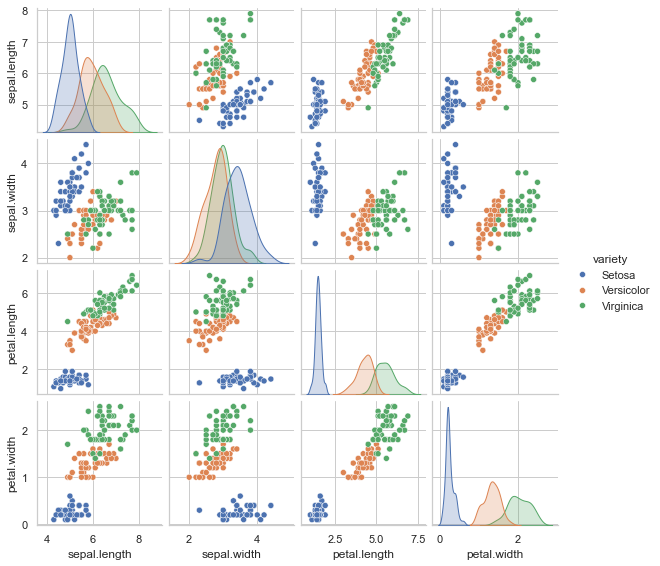

In [88]:
sb.pairplot(data, hue="variety", height=2, aspect=1)
plt.show()


In [89]:
x = data.drop("variety", axis=1)
y = data["variety"]


In [95]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
Y =LE.fit_transform(y)

In [96]:
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size=0.2,random_state=42)

In [97]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [102]:
y_predict = model.predict(x_test)
r2 = metrics.r2_score(y_test, y_predict)


In [105]:
# MAE : Calculates the mean absolute error between the actual (y_test) and predicted (y_predict) values
print('MAE:',metrics.mean_absolute_error(y_test,y_predict)) 

# MSE : Computes the mean squared error between the actual and predicted values
# if MSE=0 => No errors ; its value increases as the model error increases 
print('MSE:',metrics.mean_squared_error(y_test,y_predict))

# RMSE : Calculates the square root of the mean squared error, giving the root mean squared error 
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

#R2 : Computes the R-squared value, which represents the proportion of the variance in the dependent variable that is predictable from the independent variable
print('R2:',metrics.r2_score(y_test,y_predict))

MAE: 0.1463769496530853
MSE: 0.0371137944079769
RMSE: 0.19264940801356464
R2: 0.9468960016420044
